## Esercitazione 7 -  9 Aprile 2024

## Esercizio 2
Implementare il metodo di Newton Raphson per il calcolo del minimo assoluto (relativo) di una funzione non lineare.

Calcolare il punto di minimo delle seguenti due funzioni 
   $$\frac{1}{2}(0.001(x-1)^2+(x^2-y)^2)$$
   $$ (x^2 - y^2)^2 + (x - 1)^2$$
   $$sin\left (\frac{x^2}{2}-\frac{y^2}{4}\right)cos(2x-e^y)$$

Per la terza funzione test $$sin\left (\frac{x^2}{2}-\frac{y^2}{4}\right)cos(2x-e^y),$$ calcolo gradiente e derivate parziali usando le funzioni sumboliche di sympy.

Si tratta di una funzione non convessa, l'iterato iniziale di permettera di raggiungere uno dei minimi locali

In [9]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import sympy as sym
import sys,os
from mpl_toolkits.mplot3d import Axes3D

sys.path.append(os.path.abspath('../Scheletri'))

import Schel_FULL as sf

Minimo in  [1. 1.] numero di iterazioni  5


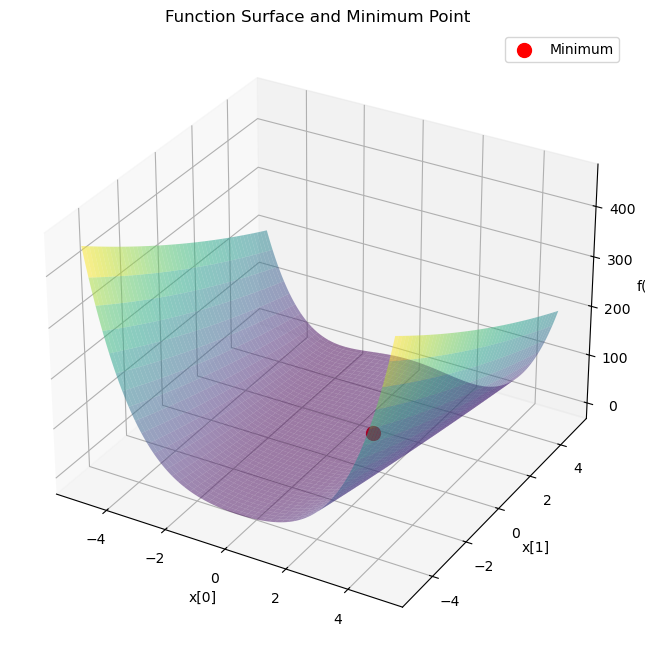

In [10]:
scelta = 1

x = sym.symbols('x[0] x[1]')

if scelta == 1:
    f_sym = 1/2 * (0.001 * (x[0]-1)**2+(x[0]**2 - x[1])**2)
    
elif scelta == 2:
    f_sym = (x[0]**2 - x[1]**2)**2 + (x[0]-1)**2

else:
    f_sym = sym.sin((x[0]**2)/2 - (x[1]**2)/4)*sym.cos(2*x[0] - sym.exp(x[1]))

hess_sym = sym.hessian(f_sym, (x[0],x[1]))
hess = np.array([[sym.lambdify((x[0], x[1]), hess_sym[i, j], np) for j in range(2)] for i in range(2)])

grad_sym = [sym.diff(f_sym, xi) for xi in x]
grad = np.array([sym.lambdify((x[0], x[1]), dxi) for dxi in grad_sym])


x0=np.array([-4.0,4.0])
tolx=1e-10
tolf=1.e-10
nmax=100
minimo,num_it,err_rel_vec= sf.newton_minimo_MOD(grad, hess, x0, tolx, tolf, nmax)
print("Minimo in ",minimo, "numero di iterazioni ",num_it)



x_vals = np.linspace(-5, 5, 400)
y_vals = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x_vals, y_vals)

# Convert the symbolic function to a numerical one for plotting
f_num = sym.lambdify((x[0], x[1]), f_sym, modules='numpy')
Z = f_num(X, Y)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)

# Plot the minimum point found by Newton's method
ax.scatter(minimo[0], minimo[1], f_num(minimo[0], minimo[1]), color='red', s=100, label='Minimum')

# Customize the plot
ax.set_xlabel('x[0]')
ax.set_ylabel('x[1]')
ax.set_zlabel('f(x)')
ax.set_title('Function Surface and Minimum Point')
ax.legend()

plt.show()




## Esercizio 3
Scrivere una funzione numpy che calcola la norma infinito e la norma 1 di un vettore ed una matrice  e testarla su vettori e matrici  a propria scelta. Confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

(Ricorda la formula della norma infinito e della norma 1 di una matrice
$||A||_\infty= \max_{j=1,n} \sum_{i} |a_{ij}| $
$\quad ||A||_1= \max_{i=1,n} \sum_{j} |a_{ij}| $)

## Esercizio 4
Implementare una funzione che calcola la norma 2 di una  matrice facendo uso della funzione eigvals del pacchetto numpy.linalg, (np.linalg.eigvals(A)). Testarla sulla matrice A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])   e confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg